In [1]:
%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm
import sys

from matplotlib.ticker import AutoMinorLocator

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.color_palette("coolwarm", 9).as_hex())
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7


In [2]:
nlons = 72
nlats = 36
grid = Spharmt(nlons,nlats,gridtype='regular',rsphere=3371e3)

tmpspec =  grid.grdtospec(np.zeros((nlats, nlons)), ntrunc=35)
print (tmpspec.size)

666


In [30]:
if glob.glob('./../model_run/dustL45_pert_test/'):
    generatePert = True
    print ('Generating pert')
else:
    generatePert = False
    print ('Looking at pert')

for j in sorted(glob.glob('./../model_run/wrfrst_d01*')):
    if('_0036-00086' in j) | ('_0037' in j) | ('_0038' in j):
        filedir = j
        if '_pert' in filedir:
            pass
        else:
            print (filedir)
            data = Dataset(filedir, 'a')
            
#             t2 = data.variables['T_2'][:][0,0]
#             t1 = data.variables['T_1'][:][0,0]
            
            if not generatePert:
                print('Looking at pert')
                pert = np.load(filedir+'_pert.npy')
                print (pert)
            else:
                print('Generating pert')

                size = int(665)
                pert = np.zeros((size))
                for i, num in enumerate(pert):
                    tmp = np.random.uniform(-100,100)
                    pert[i] = tmp
                print (pert)
                np.save(j.replace('/wrfrst_d01', '/dustL45_pert_test/wrfrst_d01')+'_pert.npy', pert)
        
            tmp = np.zeros((52, 36, 72))
            tmp2 = np.zeros((52, 36, 72))
            for i in np.arange(52):
                tmpspec =  grid.grdtospec(data.variables['T_2'][:][0,i], ntrunc=35)
                tmpspec[1:] = tmpspec[1:]*(1+0.05*pert)
                tmp[i] = grid.spectogrd(tmpspec)# - 300

                tmpspec =  grid.grdtospec(data.variables['T_1'][:][0,i], ntrunc=35)
                tmpspec[1:] = tmpspec[1:]*(1+0.05*pert)
                tmp2[i] = grid.spectogrd(tmpspec) # - 300

#             data.variables['T_2'][:] = tmp[np.newaxis,:,:,:]
#             data.variables['T_1'][:] = tmp2[np.newaxis,:,:,:]

            data.close()

Generating pert
./../model_run/wrfrst_d01_0036-00086_00_00_00
Generating pert
[ -9.01257401e+01  -2.11397031e+01  -5.77571133e+01  -8.75392036e+01
  -2.98919335e+00  -2.92020062e+01   6.35525087e+01  -2.92526702e+01
  -2.47481080e+01  -7.90433177e+00   2.40153357e+01  -3.91794743e+01
   7.18073357e+01  -1.33307787e+01   4.35761836e+01  -6.26540857e+01
  -8.80468496e+01  -6.14428101e+01  -9.59791345e+01   7.45960498e+01
   2.41273858e+01   8.95072004e+01   3.76044461e+01  -6.22316402e+01
   3.54234188e+00   8.54768255e+01  -8.71807023e+01  -1.17687188e+01
  -3.31235602e+01   6.68697080e+01  -6.54803569e+01  -9.26906796e+01
  -1.78981356e+01   2.09397644e+01  -2.27455607e+01   3.35208679e+01
   5.06172052e+01  -4.65653745e+01   7.41060815e+01   6.16568833e+01
   8.72022635e+01   5.66831523e+01   2.53344623e+01  -4.62378564e+01
  -6.65793957e+01   1.24930135e+01  -7.95278639e+01  -4.33478096e+01
   1.63210351e+01  -5.67706361e+01  -8.38225237e+01  -1.75361311e+01
   8.57504940e+01  -9.043

Generating pert
./../model_run/wrfrst_d01_0036-00086_00_00_00
Generating pert
[ 0.89808503  0.59912194 -0.4352681  -0.91347628 -0.10777362  0.8830125
  0.32018713  0.9454889   0.71567053 -0.39657954]


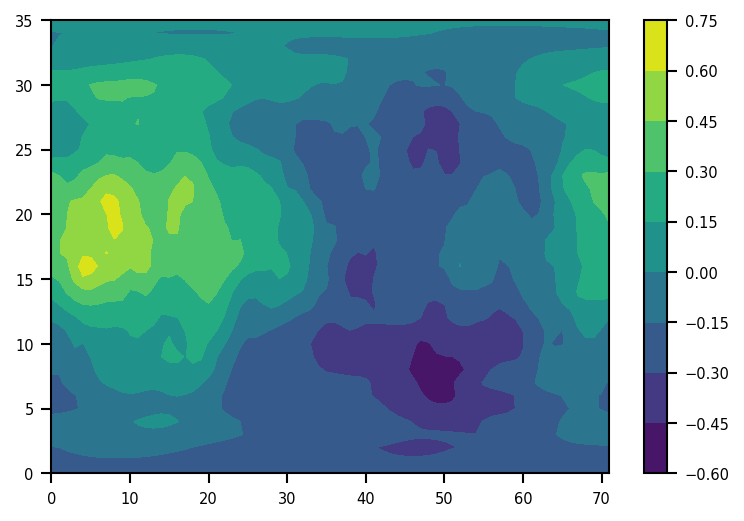

In [41]:
if glob.glob('./../model_run/dustL45_pert_test/'):
    generatePert = True
    print ('Generating pert')
else:
    generatePert = False
    print ('Looking at pert')

for j in sorted(glob.glob('./../model_run/wrfrst_d01*')):
    if('_0036-00086' in j) | ('_0037' in j) | ('_0038' in j):
        filedir = j
        if '_pert' in filedir:
            pass
        else:
            print (filedir)
            data = Dataset(filedir, 'a')
            
#             t2 = data.variables['T_2'][:][0,0]
#             t1 = data.variables['T_1'][:][0,0]
            
            if not generatePert:
                print('Looking at pert')
                pert = np.load(filedir+'_pert.npy')
                print (pert)
            else:
                print('Generating pert')

                size = int(665)
                pert = np.zeros((size))
                for i, num in enumerate(pert):
                    tmp = np.random.uniform(-1,1)
                    pert[i] = tmp
                print (pert[:10])
                np.save(j.replace('/wrfrst_d01', '/dustL45_pert_test/wrfrst_d01')+'_pert.npy', pert)
        
            tmp = np.zeros((52, 36, 72))
            tmp2 = np.zeros((52, 36, 72))
            for i in np.arange(52):
                tmpspec =  grid.grdtospec(data.variables['T_2'][:][0,i], ntrunc=35)
                tmpspec[1:] = tmpspec[1:]*(1+0.01*pert)
                tmp[i] = grid.spectogrd(tmpspec)# - 300

                tmpspec =  grid.grdtospec(data.variables['T_1'][:][0,i], ntrunc=35)
                tmpspec[1:] = tmpspec[1:]*(1+0.01*pert)
                tmp2[i] = grid.spectogrd(tmpspec) # - 300

#             data.variables['T_2'][:] = tmp[np.newaxis,:,:,:]
#             data.variables['T_1'][:] = tmp2[np.newaxis,:,:,:]
            contourf(tmp[0,:,:] - data.variables["T_2"][0,0])
            colorbar()
            data.close()

[[  62.43461609   62.41104126   62.40866089 ...,   62.66342163
    62.56729126   62.4879303 ]
 [  44.89273071   42.15478516   39.57128906 ...,   53.72174072
    50.70285034   47.75132751]
 [  22.46202087   20.39186096   17.97743225 ...,   30.17358398
    26.97068787   24.51820374]
 ..., 
 [ 127.04236603  125.73046875  124.50059509 ...,  129.84959412  129.359375
   128.33085632]
 [ 115.83642578  113.46195984  110.91873169 ...,  121.06306458
   119.70050049  117.94171143]
 [ 107.73137665  107.79445648  107.8631134  ...,  107.5801239   107.62380219
   107.67434692]]


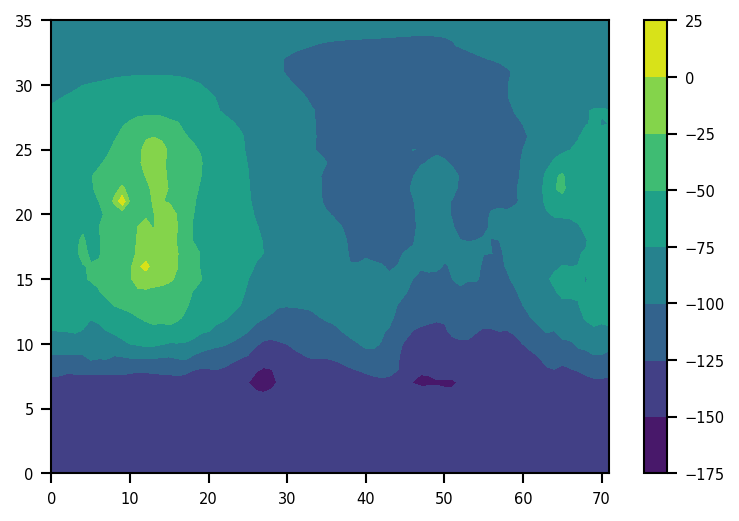

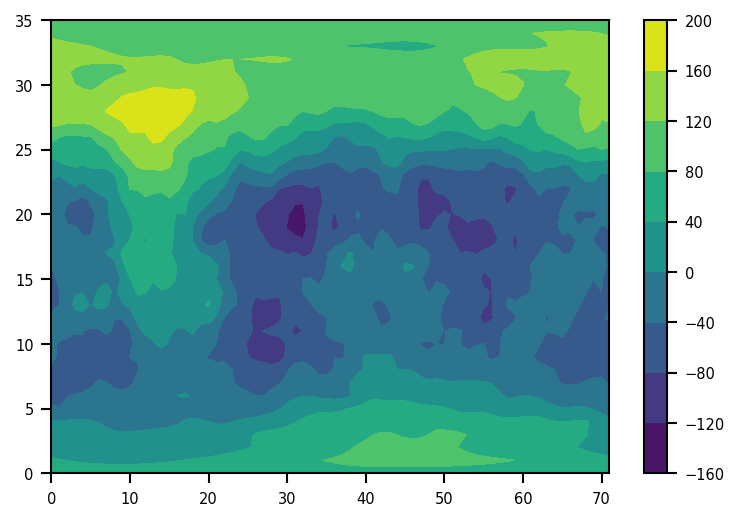

In [29]:
# print (filedir)

data = Dataset('./../model_run/dustL45/wrfrst_d01_0036-00286_00_00_00', 'a')
t2 = data.variables['T_2'][:][0,0]
data.close()

data = Dataset('./../model_run/wrfrst_d01_0036-00286_00_00_00', 'a')
t22 = data.variables['T_2'][:][0,0]
print (t2-t22)
data.close()

figure()
contourf(t2)
colorbar()

figure()
contourf(t2-t22)
colorbar()
# contourf(t1)


In [ ]:
Spharmt.grdtospec?